In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

num_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)

max_len = 500

pad_X_train = pad_sequences(X_train, maxlen = max_len)
pad_X_test = pad_sequences(X_test, maxlen= max_len)

17464789/17464789 [==============================] - 0s 0us/step


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, GlobalMaxPool1D

model = Sequential()
# 이 층은 모델의 제일 첫 번째 층으로만 사용할 수 있습니다.
# Flatten 층을 사용하기 위해 input_length를 전달합니다.
model.add(Embedding(input_dim = num_words, output_dim = 32, input_length = max_len))
model.add(Conv1D(32, 7, activation = 'relu'))
model.add(MaxPooling1D(7))
model.add(Conv1D(32, 5, activation = 'relu'))
model.add(MaxPooling1D(5))
model.add(GlobalMaxPool1D())
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           320000    
                                                                 
 conv1d (Conv1D)             (None, 494, 32)           7200      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 70, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 66, 32)            5152      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 13, 32)           0         
 1D)                                                             
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0

In [4]:
history = model.fit(pad_X_train, y_train,
                    batch_size = 32, epochs = 10,
                    validation_split = 0.2)

Epoch 1/10
625/625 [==============================] - 32s 49ms/step - loss: 0.4675 - acc: 0.7521 - val_loss: 0.3192 - val_acc: 0.8688
Epoch 2/10
625/625 [==============================] - 30s 49ms/step - loss: 0.2351 - acc: 0.9090 - val_loss: 0.3132 - val_acc: 0.8676
Epoch 3/10
625/625 [==============================] - 35s 57ms/step - loss: 0.1339 - acc: 0.9535 - val_loss: 0.3763 - val_acc: 0.8654
Epoch 4/10
625/625 [==============================] - 29s 47ms/step - loss: 0.0584 - acc: 0.9826 - val_loss: 0.4958 - val_acc: 0.8580
Epoch 5/10
625/625 [==============================] - 29s 47ms/step - loss: 0.0201 - acc: 0.9955 - val_loss: 0.6156 - val_acc: 0.8624
Epoch 6/10
625/625 [==============================] - 30s 48ms/step - loss: 0.0056 - acc: 0.9997 - val_loss: 0.7138 - val_acc: 0.8600
Epoch 7/10
625/625 [==============================] - 32s 50ms/step - loss: 0.0025 - acc: 0.9998 - val_loss: 0.7624 - val_acc: 0.8590
Epoch 8/10
625/625 [==============================] - 29s 46ms

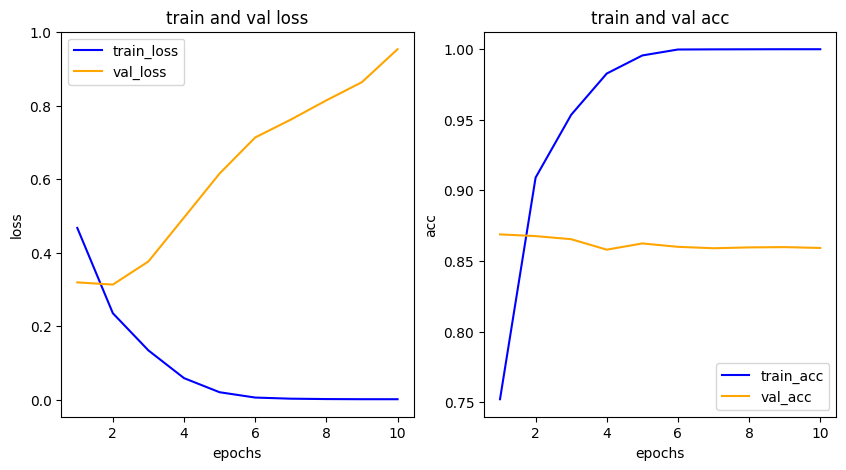

In [5]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 학습 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 학습 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

In [8]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2020)

time = np.arange(30 * 12 + 1)
month_time = (time % 30) / 30
time_series = 20 * np.where(month_time < 0.5,
                            np.cos(2 * np.pi * month_time),
                            np.cos(2 * np.pi * month_time) + np.random.random(361))

def make_sequence(time_series, n):
  x_train, y_train = list(), list()

  for i in range(len(time_series)):
    x = time_series[i:(i + n)]
    if (i + n) < len(time_series):
      x_train.append(x)
      y_train.append(time_series[i + n])
    else:
      break
  return np.array(x_train), np.array(y_train)

n = 10 # 주기 설정
x_train, y_train = make_sequence(time_series, n)

x_train = x_train.reshape(-1, n, 1)
y_train = y_train.reshape(-1, 1)

from sklearn.model_selection import train_test_split

patial_x_train = x_train[:30 * 11]
patial_y_train = y_train[:30 * 11]
x_test = x_train[30 * 11:]
y_test = y_train[30 * 11:]

print('partial_train: ',patial_x_train.shape, patial_y_train.shape)
print('test: ', x_test.shape, y_test.shape)

partial_train:  (330, 10, 1) (330, 1)
test:  (21, 10, 1) (21, 1)


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, GlobalMaxPool1D
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(Conv1D(32, 3, activation = 'relu', input_shape = (10, 1)))
model.add(MaxPooling1D(2))
model.add(Conv1D(32, 3, activation = 'relu'))

# LSTM을 혼합하여 모델을 구섭합니다.
model.add(LSTM(32, dropout = 0.2, recurrent_dropout = 0.2))
model.add(Dense(1))

model.compile(optimizer = 'adam',
              loss = 'mse',
              metrics = ['mse'])

# 학습을 진행합니다.
model.fit(x_train, y_train, epochs = 200, batch_size = 32)
pred = model.predict(x_test)

Epoch 1/200
11/11 [==============================] - 6s 11ms/step - loss: 237.9953 - mse: 237.9953
Epoch 2/200
11/11 [==============================] - 0s 10ms/step - loss: 219.9763 - mse: 219.9763
Epoch 3/200
11/11 [==============================] - 0s 12ms/step - loss: 199.7672 - mse: 199.7672
Epoch 4/200
11/11 [==============================] - 0s 16ms/step - loss: 178.1722 - mse: 178.1722
Epoch 5/200
11/11 [==============================] - 0s 18ms/step - loss: 157.5210 - mse: 157.5210
Epoch 6/200
11/11 [==============================] - 0s 14ms/step - loss: 141.5347 - mse: 141.5347
Epoch 7/200
11/11 [==============================] - 0s 13ms/step - loss: 130.1301 - mse: 130.1301
Epoch 8/200
11/11 [==============================] - 0s 14ms/step - loss: 119.5778 - mse: 119.5778
Epoch 9/200
11/11 [==============================] - 0s 14ms/step - loss: 111.1391 - mse: 111.1391
Epoch 10/200
11/11 [==============================] - 0s 9ms/step - loss: 104.0644 - mse: 104.0644
Epoch 11/2

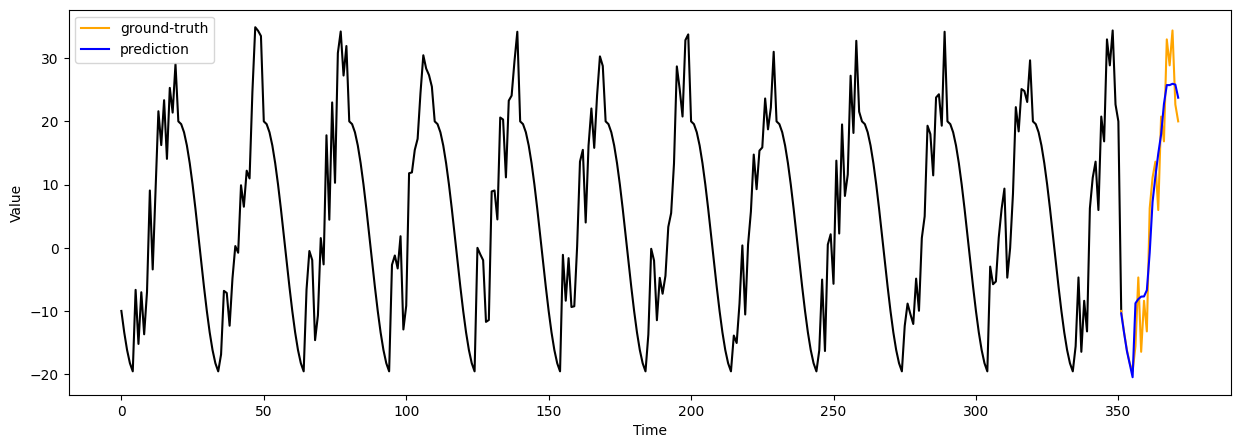

In [13]:
# 결괏값을 그립니다.
train_range = np.arange(len(x_train) + 1)
pred_range = np.arange(len(y_train), len(y_train) + len(pred))

plt.figure(figsize = (15, 5))
plt.xlabel('Time')
plt.ylabel('Value')
plt.plot(train_range, np.append(y_train, y_test[0]), color = 'black')
plt.plot(pred_range, y_test, color='orange', label='ground-truth')
plt.plot(pred_range, pred, color='blue', label='prediction')
plt.legend()
plt.show()